### MAHESH M


### GRIP Task 2

####  Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

####  Reading the Dataset 

In [2]:
df = pd.read_csv('iris.csv')
df.head()# For the first Five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()# For the Last Five Rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().any()# For finding any null values in the dataset

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [7]:
df.drop(['Id'],axis = 1,inplace = True)

In [8]:

x = df.iloc[:,:4].values

In [9]:
y = df.iloc[:,-1:]

### Finding the optimum number of clusters for k-means classification

In [10]:
wcss = []
from sklearn.cluster import KMeans
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init = 10,random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    

In [11]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

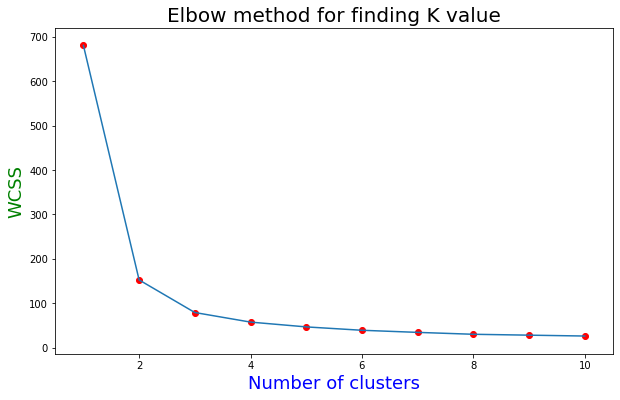

In [12]:
# Ploting the results onto the graph and observe where the elbow is determined..
plt.figure(figsize = (10,6))
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color = 'red')
plt.title('Elbow method for finding K value',fontsize = 20,)
plt.xlabel('Number of clusters',color = 'blue',fontsize = 18)
plt.ylabel('WCSS',fontsize = 18,color = 'green')# WCSS = within cluster sum of squares
plt.show()

###  From the above graph we can clearly see that the shape of the elbow is created at number of clusters = 3 so,for this dataset k value = 3 i.e., number of clusters = 3.

###      

###  Applying kmeans Classifier to the dataset

In [13]:
kmeans = KMeans(n_clusters = 3,n_init = 10,random_state =0)
y_kmeans = kmeans.fit_predict(x)

### Visualisation 

####  Visualising the clusters on Sepal length and sepal width and plotting the centroid of the clusters

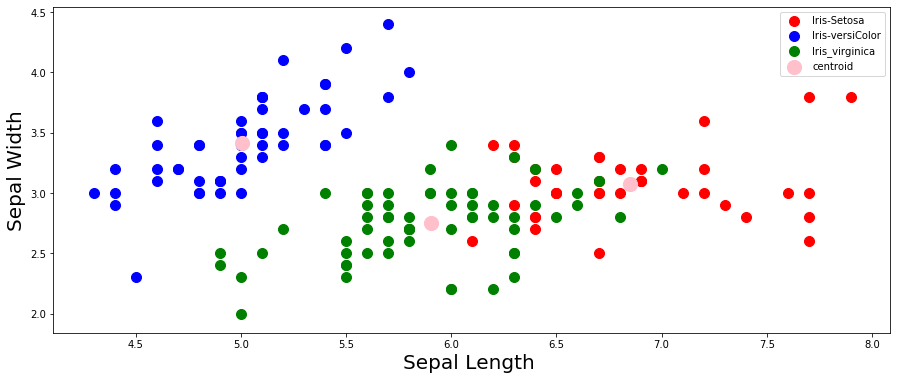

In [14]:
plt.figure(figsize =(15,6))

# plotting the clusters on sepal length and sepal width
plt.scatter(x[y_kmeans== 0,0],x[y_kmeans== 0,1],s=100,c='r',label = 'Iris-Setosa' )
plt.scatter(x[y_kmeans ==1,0],x[y_kmeans==1,1],s = 100,c = 'b',label = 'Iris-versiColor')
plt.scatter(x[y_kmeans ==2,0],x[y_kmeans == 2,1],s = 100,c='g',label = 'Iris_virginica')

# plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c = 'pink',s = 200,label = 'centroid')
plt.legend()


plt.xlabel('Sepal Length ',fontsize =20)
plt.ylabel('Sepal Width',fontsize = 20)
plt.show()

In [15]:
####  Visualising the clusters on petal length and petal width and plotting the centroid of the clusters

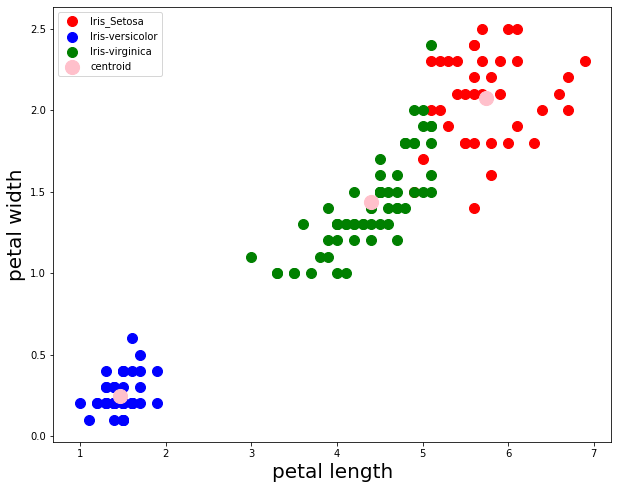

In [16]:
plt.figure(figsize = (10,8))

# plotting the clusters on petal length and petal width
plt.scatter(x[y_kmeans ==0,2],x[y_kmeans == 0,3],s = 100,c = 'r',label = 'Iris_Setosa')
plt.scatter(x[y_kmeans == 1,2],x[y_kmeans == 1,3],s = 100,c = 'b',label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,2],x[y_kmeans == 2,3],s = 100,c = 'g',label = 'Iris-virginica')

# plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s = 200,color = 'pink',label = 'centroid')
plt.legend()

plt.xlabel('petal length',fontsize = 20)
plt.ylabel('petal width',fontsize =20)
plt.show()

####  Visualising the clusters on sepal length and petal width and plotting the centroid of the clusters

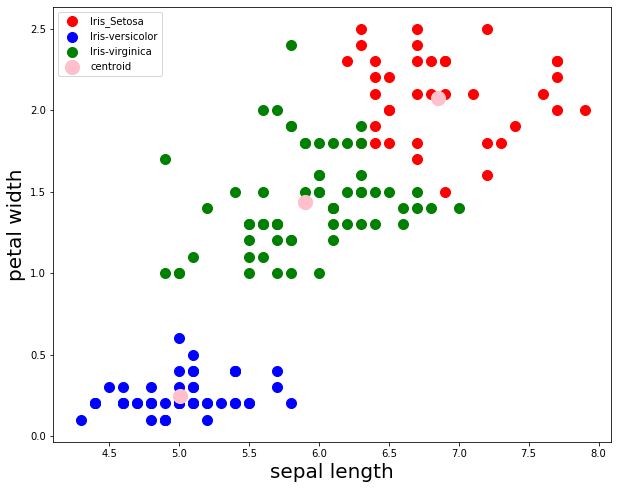

In [17]:
plt.figure(figsize = (10,8))

# plotting the clusters on sepal length and petal width
plt.scatter(x[y_kmeans ==0,0],x[y_kmeans == 0,3],s = 100,c = 'r',label = 'Iris_Setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,3],s = 100,c = 'b',label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,3],s = 100,c = 'g',label = 'Iris-virginica')

# plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,3],s = 200,color = 'pink',label = 'centroid')
plt.legend()

plt.xlabel('sepal length',fontsize = 20)
plt.ylabel('petal width',fontsize =20)
plt.show()

####  Visualising the clusters on sepal width and petal length and plotting the centroid of the clusters

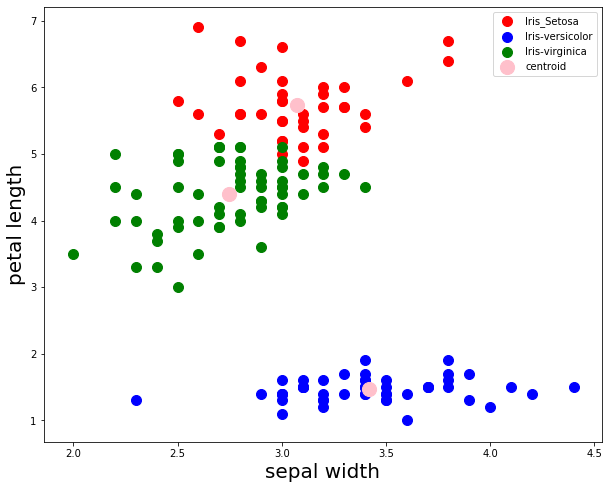

In [18]:
plt.figure(figsize = (10,8))

# plotting the clusters on sepal width and petal length
plt.scatter(x[y_kmeans ==0,1],x[y_kmeans == 0,2],s = 100,c = 'r',label = 'Iris_Setosa')
plt.scatter(x[y_kmeans == 1,1],x[y_kmeans == 1,2],s = 100,c = 'b',label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,1],x[y_kmeans == 2,2],s = 100,c = 'g',label = 'Iris-virginica')

# plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s = 200,color = 'pink',label = 'centroid')
plt.legend()

plt.xlabel('sepal width',fontsize = 20)
plt.ylabel('petal length',fontsize =20)
plt.show()